<a href="https://colab.research.google.com/github/yodair1/olympics-medals-prediction/blob/main/Olympics_Medals_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
teams = pd.read_csv('drive/MyDrive/teams.csv')
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams.corr()["medals"]

<ipython-input-99-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

In [ ]:
teams = teams[["team","country","year", "events", "athletes", "prev_medals", "prev_3_medals", "medals"]]
teams.head()

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0.0,0


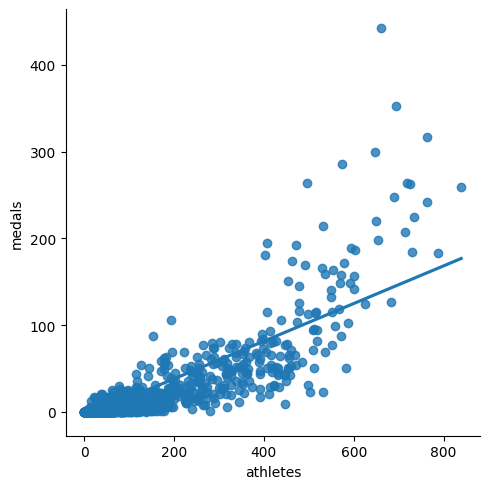

In [ ]:
sns.lmplot(x="athletes", y="medals", data = teams, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

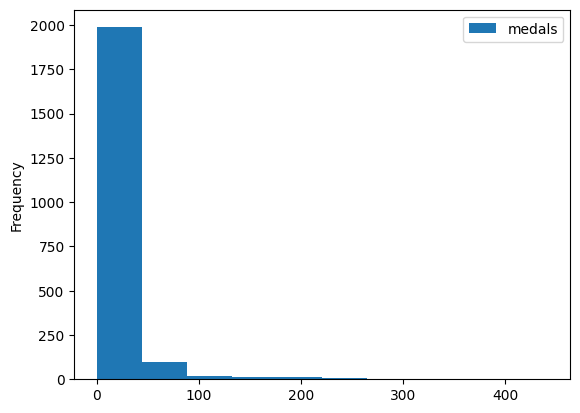

In [ ]:
teams.plot.hist(y="medals")

In [ ]:
teams[teams.isnull().any(axis = 1)]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals
19,ALB,Albania,1992,8,9,NaN,NaN,0
26,ALG,Algeria,1964,7,7,NaN,NaN,0
39,AND,Andorra,1976,2,3,NaN,NaN,0
50,ANG,Angola,1980,14,17,NaN,NaN,0
59,ANT,Antigua and Barbuda,1976,11,17,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,NaN,NaN,0
2103,YAR,North Yemen,1984,3,3,NaN,NaN,0
2105,YEM,Yemen,1992,8,8,NaN,NaN,0
2112,YMD,South Yemen,1988,5,5,NaN,NaN,0


In [ ]:
teams = teams.dropna()
teams

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals
0,AFG,Afghanistan,1964,8,8,0.0,0.0,0
1,AFG,Afghanistan,1968,5,5,0.0,0.0,0
2,AFG,Afghanistan,1972,8,8,0.0,0.0,0
3,AFG,Afghanistan,1980,11,11,0.0,0.0,0
4,AFG,Afghanistan,2004,5,5,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,0.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,0.0,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,3.0,1.0,4
2142,ZIM,Zimbabwe,2012,8,9,4.0,2.3,0


In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] == 2012].copy()

In [ ]:
print("Porcentagem de Treino: {}".format(1609/(409+1609)))

Porcentagem de Treino: 0.7973240832507433


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators = 700, random_state=42)
predictors = ["events", "athletes", "prev_3_medals", "prev_medals"]
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=700, random_state=42)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([3.26481859e-01, 2.03285993e-04, 2.83857143e+00, 0.00000000e+00,
       1.83392857e+00, 3.76304319e-02, 4.59228571e+01, 2.58142857e+00,
       3.76304319e-02, 3.76304319e-02, 1.46212857e+02, 4.47857143e+00,
       4.73285714e+00, 5.35571429e+00, 2.78494307e-02, 1.92164141e-01,
       0.00000000e+00, 5.89285714e+00, 5.87325195e-02, 6.49686231e-05,
       0.00000000e+00, 0.00000000e+00, 2.04804984e-02, 2.47857143e+01,
       5.87325195e-02, 3.76304319e-02, 5.75085714e+01, 1.24329082e+00,
       2.04804984e-02, 1.10342857e+01, 5.87325195e-02, 0.00000000e+00,
       0.00000000e+00, 5.06500000e+01, 4.40476190e-03, 0.00000000e+00,
       0.00000000e+00, 3.94571429e+00, 1.49167143e+02, 1.50832599e-01,
       1.49857143e+00, 3.76304319e-02, 4.12722522e-02, 3.40000000e+00,
       2.04804984e-02, 2.04804984e-02, 6.18224169e-02, 1.12814286e+01,
       3.96685714e+01, 0.00000000e+00, 1.00885714e+01, 1.45442857e+01,
       3.76304319e-02, 0.00000000e+00, 1.58364286e+00, 1.31974150e+00,
      

In [ ]:
test["predictions"] = y_pred
test

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,1.0,0.3,1,0.326482
24,ALB,Albania,2012,9,10,0.0,0.0,0,0.000203
37,ALG,Algeria,2012,29,39,2.0,2.3,1,2.838571
48,AND,Andorra,2012,6,6,0.0,0.0,0,0.000000
57,ANG,Angola,2012,10,35,0.0,0.0,0,1.833929
...,...,...,...,...,...,...,...,...,...
2090,VIE,Vietnam,2012,23,24,1.0,0.7,0,0.579619
2098,VIN,Saint Vincent and the Grenadines,2012,3,3,0.0,0.0,0,0.020480
2110,YEM,Yemen,2012,4,4,0.0,0.0,0,0.037630
2131,ZAM,Zambia,2012,7,7,0.0,0.0,0,0.027849


In [ ]:
test["predictions"] = test["predictions"].round()
y_pred = y_pred.round()
test

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,1.0,0.3,1,0.0
24,ALB,Albania,2012,9,10,0.0,0.0,0,0.0
37,ALG,Algeria,2012,29,39,2.0,2.3,1,3.0
48,AND,Andorra,2012,6,6,0.0,0.0,0,0.0
57,ANG,Angola,2012,10,35,0.0,0.0,0,2.0
...,...,...,...,...,...,...,...,...,...
2090,VIE,Vietnam,2012,23,24,1.0,0.7,0,1.0
2098,VIN,Saint Vincent and the Grenadines,2012,3,3,0.0,0.0,0,0.0
2110,YEM,Yemen,2012,4,4,0.0,0.0,0,0.0
2131,ZAM,Zambia,2012,7,7,0.0,0.0,0,0.0


In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do RF para 2012: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do RF para 2012: 
RMSE: 8.427313204286243
MAE: 3.127450980392157
R2: 0.910738135667009


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2053,USA,United States,2012,245,689,317.0,274.0,248,316.0


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
284,BRA,Brazil,2012,138,306,78.0,55.3,59,58.0


<Axes: ylabel='Frequency'>

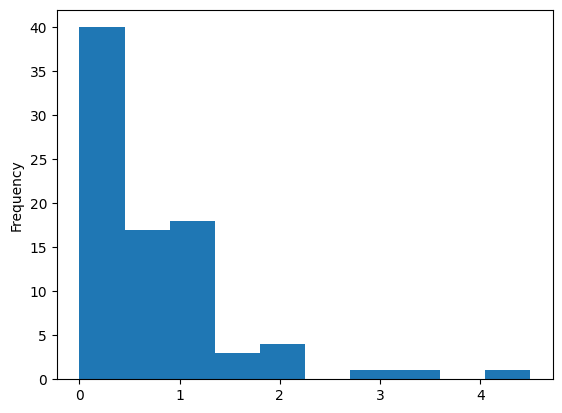

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
HKG    0.000000
ARM    0.000000
DOM    0.000000
ETH    0.000000
BRN    0.000000
         ...   
MAR    2.000000
ALG    2.000000
TPE    3.000000
GRE    3.333333
BUL    4.500000
Name: medals, Length: 85, dtype: float64

In [ ]:
train = teams[teams["year"] < 2016].copy()
test = teams[teams["year"] == 2016].copy()

In [ ]:
model = RandomForestRegressor(n_estimators = 700, random_state=42)
predictors = ["events", "athletes", "prev_3_medals", "prev_medals"]
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=700, random_state=42)

In [ ]:
y_pred = model.predict(x_test)
test["predictions"] = y_pred
test

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
7,AFG,Afghanistan,2016,3,3,1.0,0.7,0,0.043878
25,ALB,Albania,2016,6,6,0.0,0.0,0,0.000000
38,ALG,Algeria,2016,48,74,1.0,1.0,2,2.358571
49,AND,Andorra,2016,4,4,0.0,0.0,0,0.043716
58,ANG,Angola,2016,10,26,0.0,0.0,0,0.143810
...,...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,24,28,0.0,0.3,2,1.311333
2099,VIN,Saint Vincent and the Grenadines,2016,4,4,0.0,0.0,0,0.043716
2111,YEM,Yemen,2016,3,3,0.0,0.0,0,0.016894
2132,ZAM,Zambia,2016,7,7,0.0,0.0,0,0.025658


In [ ]:
test["predictions"] = test["predictions"].round()
y_pred = y_pred.round()
test

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
7,AFG,Afghanistan,2016,3,3,1.0,0.7,0,0.0
25,ALB,Albania,2016,6,6,0.0,0.0,0,0.0
38,ALG,Algeria,2016,48,74,1.0,1.0,2,2.0
49,AND,Andorra,2016,4,4,0.0,0.0,0,0.0
58,ANG,Angola,2016,10,26,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,24,28,0.0,0.3,2,1.0
2099,VIN,Saint Vincent and the Grenadines,2016,4,4,0.0,0.0,0,0.0
2111,YEM,Yemen,2016,3,3,0.0,0.0,0,0.0
2132,ZAM,Zambia,2016,7,7,0.0,0.0,0,0.0


In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do RF para 2016: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do RF para 2016: 
RMSE: 9.519030428489419
MAE: 3.3582089552238807
R2: 0.8948606730800049


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2054,USA,United States,2016,245,719,248.0,276.0,264,261.0


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
285,BRA,Brazil,2016,222,583,59.0,59.0,50,121.0


<Axes: ylabel='Frequency'>

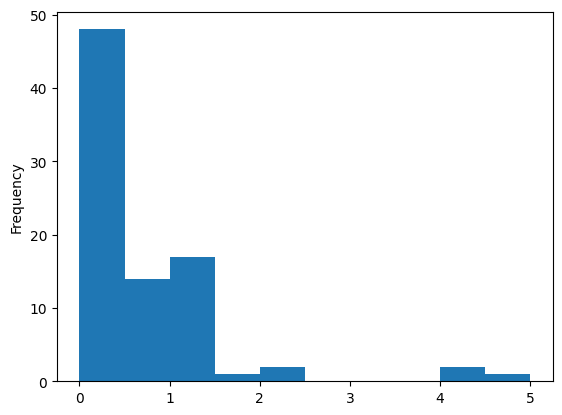

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
ALG    0.0
SLO    0.0
POL    0.0
HUN    0.0
INA    0.0
      ... 
SGP    2.0
MEX    2.0
FIN    4.0
MAR    4.0
TTO    5.0
Name: medals, Length: 85, dtype: float64

MLP

In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] == 2012].copy()
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = 8000, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
test["predictions"] = y_pred
y_pred = y_pred.round()
test["predictions"] = test["predictions"].round()

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do MLP para 2012: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do MLP para 2012: 
RMSE: 7.487571401342098
MAE: 2.8676470588235294
R2: 0.9295356196592754


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2053,USA,United States,2012,245,689,317.0,274.0,248,302.0


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
284,BRA,Brazil,2012,138,306,78.0,55.3,59,65.0


<Axes: ylabel='Frequency'>

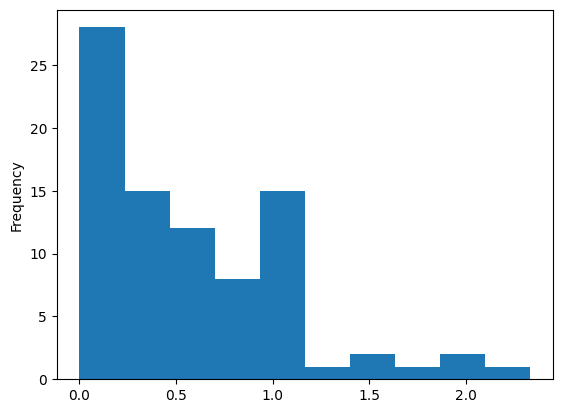

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
VEN    0.000000
ALG    0.000000
KEN    0.000000
GAB    0.000000
ETH    0.000000
         ...   
BUL    1.500000
SUI    1.750000
MAR    2.000000
BEL    2.000000
GRE    2.333333
Name: medals, Length: 85, dtype: float64

In [ ]:
train = teams[teams["year"] < 2016].copy()
test = teams[teams["year"] == 2016].copy()
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]

In [ ]:
model = MLPRegressor(hidden_layer_sizes = 8000, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
test["predictions"] = y_pred
y_pred = y_pred.round()
test["predictions"] = test["predictions"].round()

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do MLP para 2016: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do MLP para 2016: 
RMSE: 8.897425420000868
MAE: 3.472636815920398
R2: 0.908143800035636


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2054,USA,United States,2016,245,719,248.0,276.0,264,272.0


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
285,BRA,Brazil,2016,222,583,59.0,59.0,50,88.0


<Axes: ylabel='Frequency'>

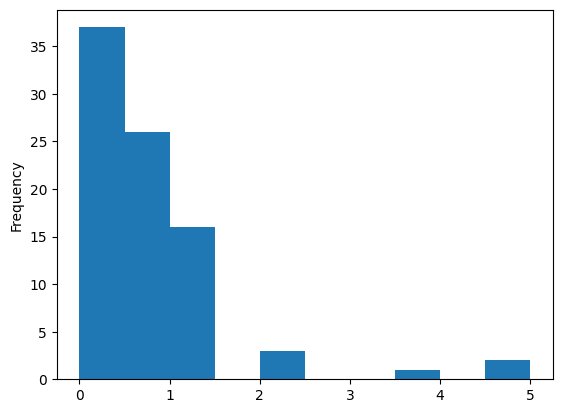

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
MGL    0.0
TUN    0.0
VEN    0.0
DOM    0.0
SUI    0.0
      ... 
FIN    2.0
MEX    2.0
IND    3.5
POR    5.0
TTO    5.0
Name: medals, Length: 85, dtype: float64

SVR

In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] == 2012].copy()
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel = "poly")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
test["predictions"] = y_pred
y_pred = y_pred.round()
test["predictions"] = test["predictions"].round()

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do SVR para 2012: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do SVR para 2012: 
RMSE: 10.048900047112756
MAE: 3.9607843137254903
R2: 0.873081556787713


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
284,BRA,Brazil,2012,138,306,78.0,55.3,59,29.0


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2053,USA,United States,2012,245,689,317.0,274.0,248,286.0


<Axes: ylabel='Frequency'>

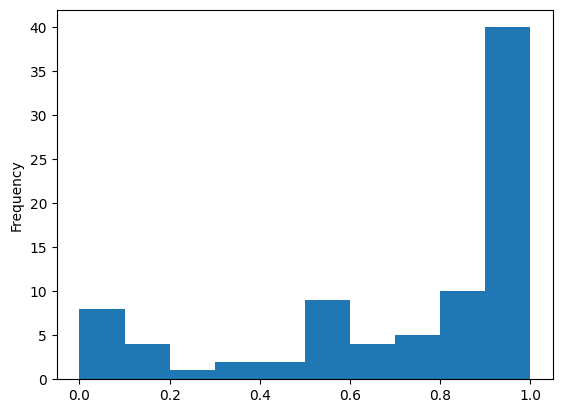

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
GRE    0.0
POR    0.0
MAR    0.0
BEL    0.0
HKG    0.0
      ... 
LAT    1.0
MAS    1.0
MDA    1.0
MNE    1.0
VEN    1.0
Name: medals, Length: 85, dtype: float64

In [ ]:
train = teams[teams["year"] < 2016].copy()
test = teams[teams["year"] == 2016].copy()
x_train = train[predictors]
y_train = train["medals"]
x_test = test[predictors]
y_test = test["medals"]

In [ ]:
model = SVR(kernel = "poly")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
test["predictions"] = y_pred
y_pred = y_pred.round()
test["predictions"] = test["predictions"].round()

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do SVR para 2016: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do SVR para 2016: 
RMSE: 11.029359281896399
MAE: 4.412935323383085
R2: 0.8588501794036788


In [ ]:
test[test["team"]=="BRA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
285,BRA,Brazil,2016,222,583,59.0,59.0,50,124.0


In [ ]:
test[test["team"]=="USA"]

,team,country,year,events,athletes,prev_medals,prev_3_medals,medals,predictions
2054,USA,United States,2016,245,719,248.0,276.0,264,229.0


<Axes: ylabel='Frequency'>

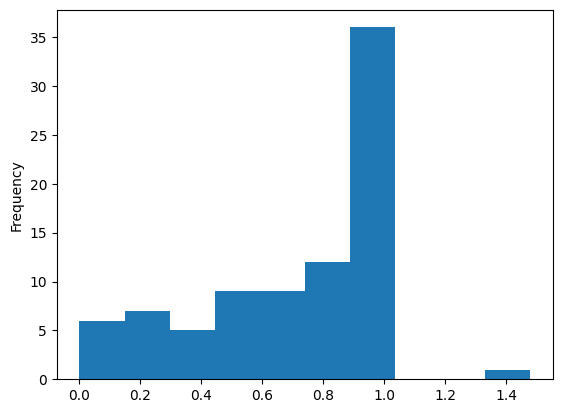

In [ ]:
errors = (y_test - y_pred).abs()
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = y_test.groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
FIN    0.000000
IND    0.000000
VEN    0.000000
CHN    0.026549
FRA    0.031250
         ...   
MAS    1.000000
NIG    1.000000
GRN    1.000000
VIE    1.000000
BRA    1.480000
Name: medals, Length: 85, dtype: float64